In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("global_heat_index.csv")

In [9]:
data.shape

(17520, 11)

In [10]:
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [11]:
# Cleaning up the data
clean1 = data[data['Hour'] < 6]
clean2 = data[data['Hour'] > 18]

print("Cleaning Data from 12:00 am to 5:59 am")
clean1.head(10)

Cleaning Data from 12:00 am to 5:59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
24,2011,1,2,0,3,10.231350,984.838196,61.345492,79.954536,2.360912,0
25,2011,1,2,1,3,9.653407,984.457092,63.566375,87.481873,2.193934,0
26,2011,1,2,2,3,9.165823,984.032227,66.509376,90.634872,1.904846,0
27,2011,1,2,3,3,8.773836,984.161560,69.923065,90.924843,1.597840,0


In [12]:
data =  data.drop(clean1.index, axis=0)
data =  data.drop(clean2.index, axis=0)

In [13]:
data

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
...,...,...,...,...,...,...,...,...,...,...,...
17510,2012,12,31,14,-8,24.219059,983.661621,10.363324,5.771851,1.837763,553
17511,2012,12,31,15,-9,22.715263,983.482239,11.240004,8.507614,1.937734,408
17512,2012,12,31,16,-7,19.968041,983.660339,14.983540,17.507896,2.191131,221
17513,2012,12,31,17,-5,16.706517,983.768677,21.564891,29.407814,2.675606,16


In [14]:
x = data.iloc[:, 4:10].values
y = data.iloc[:, 10].values 

y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [16]:
print (x_train)

[[ 1.05968611 -0.10596836 -0.86953246  1.20221031  0.39135863  0.85990992]
 [-0.37392147  0.19583916  0.47710333 -0.76144896 -1.50792046 -0.50344039]
 [-0.55312242  1.93732438 -0.45296102 -1.2558607   0.65110389 -0.08327831]
 ...
 [-0.91152432 -1.53411535  1.4209813  -0.25832627 -1.86235409 -0.79438603]
 [ 1.14928659 -0.49504108 -0.63737524  2.10272218  0.19963805  0.43482279]
 [ 1.23888706 -0.16074724 -0.86803804  1.65343846  0.47756634  0.12011598]]


In [17]:
from sklearn.cluster import KMeans

kmeans  = KMeans(n_clusters = 6, random_state = 0, n_jobs=-1)
kmeans = kmeans.fit(x_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [18]:
# View predict class
labels = kmeans.labels_
print("Labels : ", labels)

# View cluster centers
cluster_centers = kmeans.cluster_centers_
print("\n\n Cluster Centroids : \n", cluster_centers)

Labels :  [3 1 4 ... 5 3 3]


 Cluster Centroids : 
 [[ 0.14422181 -0.38016834  0.65228441  0.18902493  0.69331652 -0.78895838]
 [-0.61415761 -0.23290516  0.85420147 -0.57131165 -1.34729091 -0.69631946]
 [ 0.40408828  1.04687726 -1.07392531 -0.40424013  0.5093422   1.49695155]
 [ 1.18727882  0.07020777 -0.92997937  1.2739464   0.25531325 -0.09853766]
 [-1.06786875  0.70284215  0.0402388  -1.16885515  0.8320169   0.01378224]
 [-0.6473574  -1.64823242  1.18054273  0.26767356 -1.09171284 -0.02914552]]


In [19]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 2).fit(x_train)

In [20]:
pca_model = pca_model.transform(x_train)

In [21]:
pca_model

array([[-1.59837425, -1.04649685],
       [ 1.2422458 ,  0.2751212 ],
       [-0.79398024,  2.07624203],
       ...,
       [ 2.88500539, -0.70662158],
       [-1.31961631, -2.03068811],
       [-1.55187659, -1.6325982 ]])

In [23]:
print(x_train)

[[ 1.05968611 -0.10596836 -0.86953246  1.20221031  0.39135863  0.85990992]
 [-0.37392147  0.19583916  0.47710333 -0.76144896 -1.50792046 -0.50344039]
 [-0.55312242  1.93732438 -0.45296102 -1.2558607   0.65110389 -0.08327831]
 ...
 [-0.91152432 -1.53411535  1.4209813  -0.25832627 -1.86235409 -0.79438603]
 [ 1.14928659 -0.49504108 -0.63737524  2.10272218  0.19963805  0.43482279]
 [ 1.23888706 -0.16074724 -0.86803804  1.65343846  0.47756634  0.12011598]]


In [26]:
pca = pca_model

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


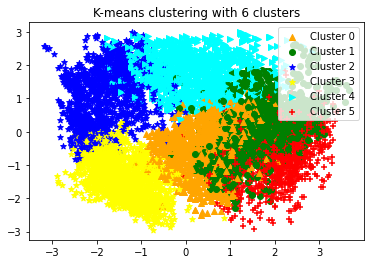

In [27]:
for i in range(0, pca_model.shape[0]):
    if kmeans.labels_[i] == 0:
        c1_6 = plt.scatter(pca[i, 0], pca[i, 1], c = 'orange', marker = "^")
        
    elif kmeans.labels_[i] == 1:
        c2_6 = plt.scatter(pca[i,0],pca[i,1],c='g', marker='o')
    
    elif kmeans.labels_[i] == 2:
        c3_6 = plt.scatter(pca[i,0],pca[i,1],c='b', marker='*')
    
    elif kmeans.labels_[i] == 3:
        c4_6 = plt.scatter(pca[i,0],pca[i,1],c='yellow', marker='*')
  
    elif kmeans.labels_[i] == 4:
        c5_6 = plt.scatter(pca[i,0],pca[i,1],c='cyan', marker='>')
    
    elif kmeans.labels_[i] == 5:
        c6_6 = plt.scatter(pca[i,0],pca[i,1],c='red', marker='+')
        

plt.rcParams["figure.figsize"] = (12, 10)
plt.legend([c1_6, c2_6, c3_6, c4_6, c5_6, c6_6],['Cluster 0', 'Cluster 1', 
                                                 'Cluster 2', 'Cluster 3', 
                                                 'Cluster 4', 'Cluster 5'])
plt.title('K-means clustering with 6 clusters')
plt.show()
        